### Eserczio gradient descent Nesterov


Applico il metodo di minimizzazione della cost function $E$ attraverso il gradient descent e sfruttando le proprietà del "momentum" tramite l'algoritmo di Nesterov.

La funzione da minimizzare è la seguente:
\begin{equation}
E=b(1-e^{-\frac{1}{2}w(x^2+y^2)}) + \frac{1}{2}q(-x^3+y)^2
\end{equation}

Con il gradiente in componenti:

componente x
\begin{equation}
be^{-\frac{1}{2}w(x^2+y^2)}wx - 3qx^2(-x^3+y)
\end{equation}

componente y 
\begin{equation}
be^{-\frac{1}{2}w(x^2+y^2)}wy + q(-x^3+y)
\end{equation}

con parametri $w=10$ $q=\frac{1}{10}$ e $b=20$

In [2]:
#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest

#Import Numpy
import numpy as np

#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(0, 40)
    
    plt.xticks([-3, -2, 0, 2, 3], ["-3", "-2", "0", "2", "3"])
    plt.yticks([-3, -2, 0, 2, 3], ["-3", "-2", "0", "2", "3"])
    ax.set_zticks([0, 20, 40])
    ax.set_zticklabels(["0", "20", "40"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax
    # queste funzioni servono banalmente a costruire le figures e gli axes che conterranno i plot della cost function E che abbiamo definito inizialmente 


def overlay_trajectory_quiver(ax,obj_func,trajectory):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],arrow_length_ratio=0.3)
    
    return ax

def overlay_trajectory(ax,obj_func,trajectory,label):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, label=label)
    
    return ax

    
def overlay_trajectory_contour_M(ax,trajectory, label,lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],'->', markersize=14)
    return ax

def overlay_trajectory_contour(ax,trajectory, label,lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, label=label,lw=lw)
    return ax

In [3]:
# adesso definiamo la superficie con cui andremo a lavorare e il vettore gradiente, in questo caso nelle componenti x e y 

def cost_function(x,y):
    b=20
    w=10
    q=1/10
    return b*(1-np.exp(-0.5*w*(x**2+y**2)))+0.5*q*(-x**3+y)**2
    
def grad(params):
    x = params[0]
    y = params[1]
    b=20
    w=10
    q=1/10
    gradx = b*np.exp(-0.5*w*(x**2+y**2))*w*x-3*q*(x**2)*(-x**3+y)
    grady = b*np.exp(-0.5*w*(x**2+y**2))*w*y+q*(x**3+y)
    return [gradx, grady]

def contour_cost_function():
    x, y = np.meshgrid(np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=cost_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    
    return fig,ax

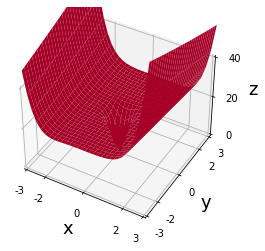

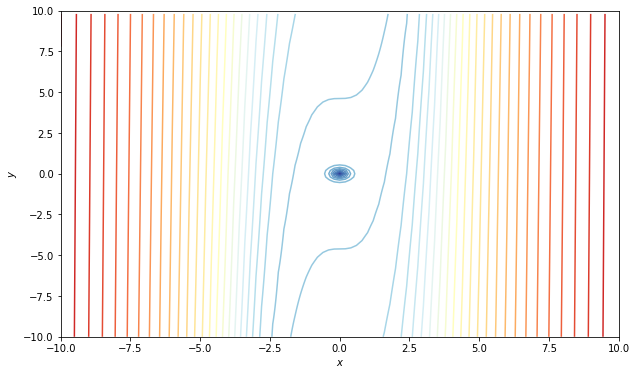

In [4]:
x, y = np.mgrid[-3:3.1:31j, -3:3.1:31j]
# utilizzare come step un numero complesso fa le veci di linspace senza tenere nel meshgrid l'estremo destro dell'intervallo che stiamo considerando. In questo modo infatti 31j individua il numero di elementi che possiede ciascun array della griglia
plt.close() # closes previous plots
fig1, ax1 = plot_surface(x,y,cost_function(x,y))
fig2, ax2 = contour_cost_function()
plt.show()

In [5]:
# la seguente funzione descrive l'algoritmo di Nesterov da implementare come gradient descent per trovare il minimo della cost function E

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

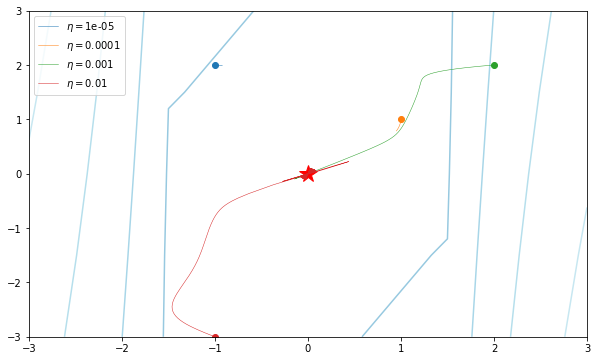

In [6]:
x,y = np.mgrid[-3:3:5j, -3:3:5j]
plt.close()
fig, ax = plt.subplots(figsize=(10, 6))
z=np.abs(cost_function(x,y))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18) # questo dovrebbe essere dove si trova il minimo globale della  funzione per capire alla fine dopo quante iterazioni e con quale precisione l'algoritmo NAG converge a tale minimo

# variando i punti iniziali dell'algoritmo scelgo opportunamente il valore del learning rate in questo modo. Per ciascun punto iniziale calcolo l'errore commesso dall'algoritmo per raggiungere il minimo nello stesso numero di epochs, ad esempio 100. Tale errore altro non è che la differenza tra il minimo a cui arriviamo e quello invece globale teorico della funzione (0,0). Essendo però i punti iniziali appartenenti alla griglia [-3,3]x[-3,3] l'errore diventa la somma dei quadrati dei minimi ottenuti come output per ogni punto iniziale (norma L2 essendo il minimo teorico l'origine mi basta sommare al quadrato i minimi che produco). In sostanza fisso il learning rate e calcolo quest errore. Infine rappresento al variare dei learning rates che ho scelto gli errori prodotti.
 

learning_rates = np.logspace(-5,-2,4)
initial_points = [[-1,2], [1,1], [2,2], [-1,-3]]
# scorro nell'array dei learning rates e in quello dei punti iniziali presi casualmente all'interno di x,y
for eta,init in zip(learning_rates,initial_points):
    gdn = NAG(grad,init, n_epochs=1000, eta=eta)
    overlay_trajectory_contour(ax,gdn,'$\eta=$%s'% eta,lw=0.5)
    plt.scatter(init[0], init[1])

plt.legend(loc=2)
plt.show()

Si osserva come sia il learning rate e gamma che il punto iniziale dell'algoritmo siano parametri da regolare per ottenere il miglior risultato possibile. Per tenere in conto tutte le possibili condizioni iniziali per ogni iterazione considero come risultato dell'algoritmo il valor medio delle somme al quadrato dei $Q$ diversi output (dove $Q$ sono il numero di punti iniziali che stiamo usando). In questo modo costruiamo un array contenente, per un certo learning rate e gamma al variare del numero di iterazioni, l'errore commesso dall'algoritmo nell'approssimare il minimo della funzione con un punto $(x,y) \neq (0,0)$. Ripeto questo procedimento per ogni learning rate e gamma che voglio testare, ottenendo alla fine tanti array quanti sono le possibili coppie learning rate,gamma e di dimensione pari al numero di iterazioni.

In [7]:
gd_test = np.zeros(shape=(1001,2))
for a,b in np.vstack([x.ravel(), y.ravel()]).T:
    gd_1_test = NAG(grad,[a,b], n_epochs=1000, eta=10**-2, gamma = 0.9)
    gd_test += gd_1_test**2
    #print(gd_1)
number_of_points = np.shape(np.vstack([x.ravel(), y.ravel()]).T)[0]

In [8]:
np.sqrt((gd_test[-1]/number_of_points).sum())

0.09752993086534538

Questa è la media che tanto cercavamo. Per trovare il miglior learning rate bisogna confrontare l'ultima riga di questo risultato con gli altri risultati che otterremo utilizzando $\eta$ e $\gamma$ diversi. Vediamo infatti che:

Text(0.5, 1.0, 'Errore di NAG al variare del tempo')

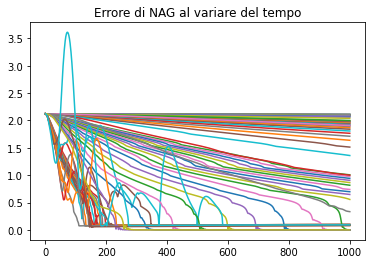

In [9]:
gd = np.zeros(shape=(1001,2))
result = []
for gamma in np.linspace(0.8,0.99,20):
    for eta in learning_rates:
        gd = np.zeros(shape=(1001,2))
        for a,b in np.vstack([x.ravel(), y.ravel()]).T:
            gd_1 = NAG(grad,[a,b], n_epochs=1000, eta=eta, gamma=gamma)
            gd += gd_1**2
        plt.plot(np.arange(1001),np.sqrt(gd/number_of_points)[:,1])
        result.append(gd[-1,:])
plt.title('Errore di NAG al variare del tempo')

In [10]:
# posso quindi definire l'errore ottenuto come la discrepanza tra l'ultimo punto che in media è restituito dall'algoritmo e il minimo analitico. L'array risultante è composto da tanti elementi quante sono le combinazioni dei 20 parametri gamma e dei quattro learning rates (80 cvd)
discrepancy = np.sqrt(np.array(result).sum(axis=1)/number_of_points)
len(discrepancy)

80

In [11]:
couples = [[i,j] for i in np.linspace(0.8,0.99,20) for j in learning_rates]
# sono tutte le possibili coppie scritte tramite una list comprehension che simula i due nested for che si trovano nel loop della cella precedente con i quali sono stati rappresentati i diversi plot 
len(couples)

80

In [12]:
# la miglior coppia gamma,eta è quella che ottiene il minor errore, ovvero si avvicina di più al minimo analiticamente trovato (0,0)
best_gamma = couples[np.argmin(discrepancy)][0]
best_eta = couples[np.argmin(discrepancy)][1]
print("la coppia (gamma,eta) che ottiene il minore errore è:", [best_gamma,best_eta])

la coppia (gamma,eta) che ottiene il minore errore è: [0.98, 0.001]


Posso finalmente rappresentare al variare del numero di epochs l'errore risultante dalla migliore scelta dei parametri per l'algoritmo NAG di gradient descent

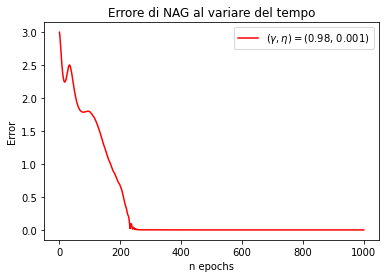

In [13]:
gd_final = np.zeros(shape=(1001,2))
for a,b in np.vstack([x.ravel(), y.ravel()]).T:
    gd_1_final = NAG(grad,[a,b], n_epochs=1000, eta=best_eta, gamma=best_gamma)
    gd_final += gd_1_final**2
y_final = np.sqrt(gd_final.sum(axis=1)/number_of_points)
plt.plot(np.arange(1001), y_final, 'r', label='$(\gamma,\eta)=$' + str((best_gamma,best_eta)))
plt.title('Errore di NAG al variare del tempo')
plt.xlabel('n epochs')
plt.ylabel('Error')
plt.legend()